In [5]:
%pip install seaborn

     -------------------------------------- 293.3/293.3 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 10.0/10.0 MB 551.0 kB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:

# EPOCHS

epochs=[2,25,50,100,150,200,250]

# epochs=[300]




In [3]:
import os
from quickcsv.file import *

for file in os.listdir('logs2'):
    if not file.endswith('.h5'):
        train_file=os.path.join('logs2',file,'train.csv')
        list_train=read_csv(train_file)
        epochs=len(list_train)
        print("Epochs: ",epochs)
        for item in list_train:
            if str(item['loss'])!='nan' and str(item['val_loss'])!='nan':
                epoch=float(item['epoch'])
                loss=float(item['loss'])
                val_loss=float(item['val_loss'])
                print(epoch,loss,val_loss)
        print()


Read CSV: ['epoch', 'loss', 'val_loss']  <- (logs2\infrared20230606T2348\train.csv)
Epochs:  2

Read CSV: ['epoch', 'loss', 'val_loss']  <- (logs2\infrared20230607T0808\train.csv)
Epochs:  50
20.0 2.89970463514328 3.3664752006530763
22.0 2.92049290060997 3.240373134613037
23.0 2.8267636585235594 3.042051315307617
25.0 2.807438349723816 3.3538792610168455
26.0 2.7878313565254214 3.06189386844635
30.0 2.5938684368133544 2.8209525108337403
31.0 2.6319572281837464 3.254809355735779
33.0 2.588653597831726 3.106781005859375
34.0 2.5256953823566435 2.823733377456665
36.0 2.5058820414543153 2.9056296825408934
37.0 2.53581463932991 3.065415859222412
38.0 2.5391526055336 2.92778217792511
39.0 2.454388052225113 3.2319384098052977
40.0 2.488249921798706 2.9757013082504273
41.0 2.411301864385605 2.696104717254639
42.0 2.5266166126728056 2.898835849761963
43.0 2.4034497392177583 3.1274901151657106
44.0 2.3853640329837797 2.8954159736633303
45.0 2.380973960161209 2.6910616159439087
47.0 2.38122691154

Read CSV: ['epoch', 'loss', 'val_loss']  <- (logs2/infrared20230607T1653/train.csv)
No. Epoch:  150


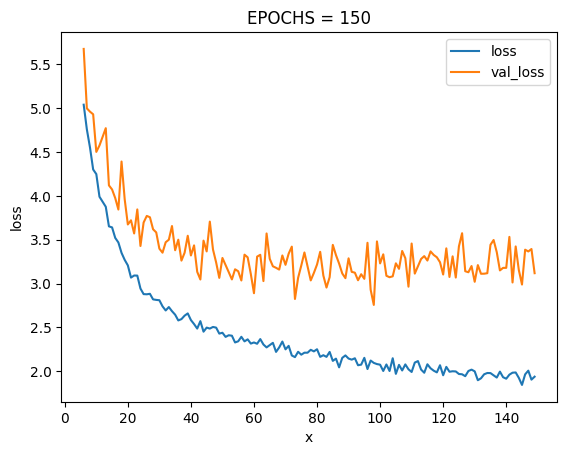

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

log_id='infrared20230607T1653'

csv_path=f'logs2/{log_id}/train.csv'

list_train=read_csv(csv_path)

print("No. Epoch: ",len(list_train))

list_m=[]
for item in list_train:
    if str(item['loss'])!='nan' and str(item['val_loss'])!='nan':
        x=int(item['epoch'])
        loss=float(item['loss'])
        val_loss=float(item['val_loss'])
        list_m.append({
            'x':x,
            'loss':loss,
            'val_loss':val_loss
        })


# Load the example dataset
data = create_df(list_m)
plt.title('EPOCHS = ' +  str(len(list_train)))
# Plot the responses for different events and regions
sns.lineplot(x="x", y="loss", data=data,label='loss')
sns.lineplot(x="x", y="val_loss", data=data,label='val_loss')

# Show the plot
plt.show()

Read CSV: ['epoch', 'loss', 'val_loss']  <- (logs2/infrared20230607T0808/train.csv)
No. Epoch:  50


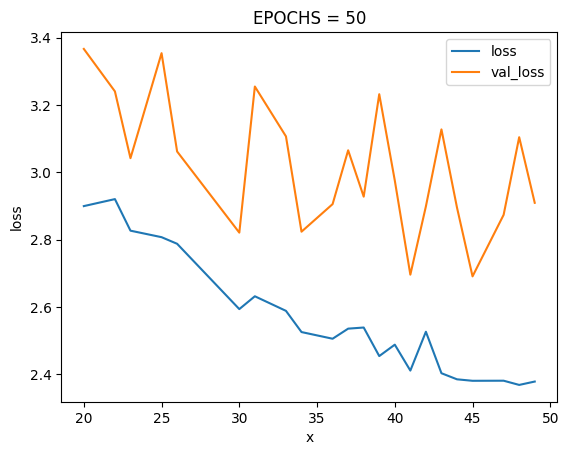

Read CSV: ['epoch', 'loss', 'val_loss']  <- (logs2/infrared20230607T1236/train.csv)
No. Epoch:  100


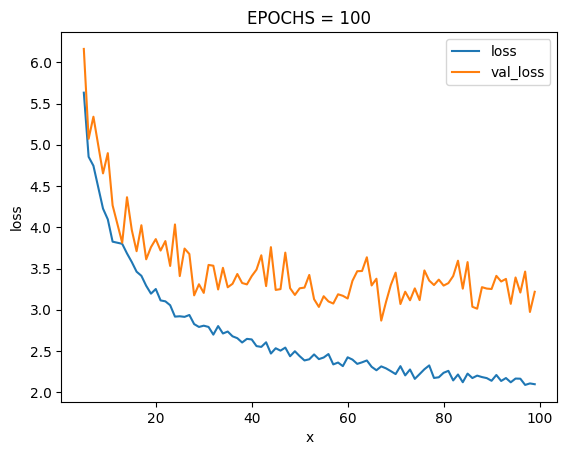

Read CSV: ['epoch', 'loss', 'val_loss']  <- (logs2/infrared20230607T1408/train.csv)
No. Epoch:  200


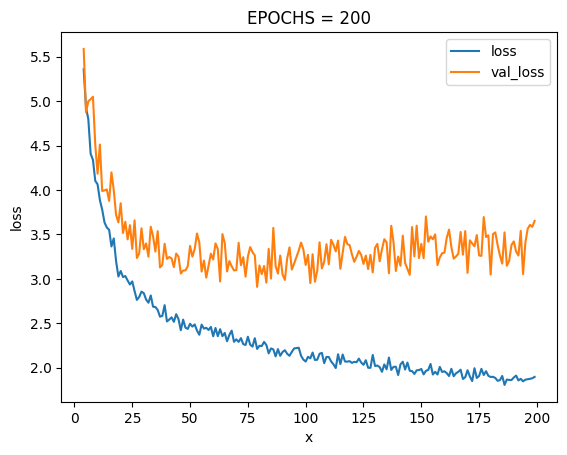

Read CSV: ['epoch', 'loss', 'val_loss']  <- (logs2/infrared20230607T1653/train.csv)
No. Epoch:  150


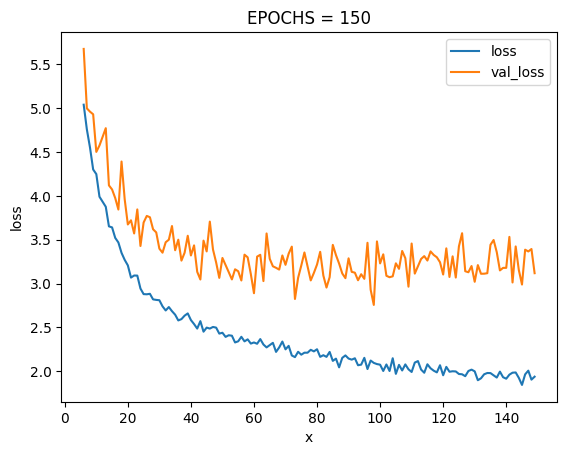

In [4]:

epochs=[50,100,150,200]

log_ids=['infrared20230607T0808','infrared20230607T1236','infrared20230607T1408','infrared20230607T1653']

renders=[]

for log_id in log_ids:

    # log_id='infrared20230607T1653'

    csv_path=f'logs2/{log_id}/train.csv'

    list_train=read_csv(csv_path)

    print("No. Epoch: ",len(list_train))

    list_m=[]
    for item in list_train:
        if str(item['loss'])!='nan' and str(item['val_loss'])!='nan':
            x=int(item['epoch'])
            loss=float(item['loss'])
            val_loss=float(item['val_loss'])
            list_m.append({
                'x':x,
                'loss':loss,
                'val_loss':val_loss
            })


    # Load the example dataset
    data = create_df(list_m)
    plt.title('EPOCHS = ' +  str(len(list_train)))
    # Plot the responses for different events and regions
    sns.lineplot(x="x", y="loss", data=data,label='loss')
    sns.lineplot(x="x", y="val_loss", data=data,label='val_loss')

    # Show the plot
    plt.show()



# Evaluation for Comparison

In [4]:
# Configure
DIM = 128
EPOCHS = 150

root_path=fr'G:\UIBE科研\红外成像\InfraData\datasets-thermal-face\thermal_{DIM}'

dataset_path=fr'G:\UIBE科研\红外成像\InfraData\datasets-thermal-face\list_face_detection_{DIM}_merged.csv'

list_item=read_csv(dataset_path)
print('No. images: ',len(list_item))



Read CSV: ['name', 'masks', 'labels']  <- (G:\UIBE科研\红外成像\InfraData\datasets-thermal-face\list_face_detection_128_merged.csv)
No. images:  2935


In [5]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
# print(tf.__version__)
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

os.environ['CUDA_VISIBLE_DEVICES']='-1'

# tf 1.13
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.95)
config = tf.ConfigProto(gpu_options=gpu_options)
# config.gpu_options.per_process_gpu_momory_fraction=0.7
# config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

# tf 2.0
# gpu = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(gpu[0], True)
# gpu = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(gpu[1], True)

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = "logs2"






correct directory imported


Using TensorFlow backend.


In [6]:
#  model configuration 
class Infrared2Config(Config):
    """Configuration for training on the toy infrared dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "infrared"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2

    # Number of classes (including background)
    NUM_CLASSES = 1 + 9  # background + 3 shapes

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape. Default = 128
    IMAGE_MIN_DIM = DIM
    IMAGE_MAX_DIM = DIM

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs. 32
    TRAIN_ROIS_PER_IMAGE = 5

    # Use a small epoch since the data is simple, Default =100
    STEPS_PER_EPOCH = 100

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 10
    
config = Infrared2Config()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                22
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'bdry_score_loss': 1.0}
MASK_POOL_SIZE                 14

In [7]:
class InferenceConfig(Infrared2Config):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

def load_model(model_path):

    inference_config = InferenceConfig()

    # Recreate the model in inference mode
    model = modellib.MaskRCNN(mode="inference", 
                            config=inference_config,
                            model_dir=MODEL_DIR)

    # Get path to saved weights
    # Either set a specific path or find last trained weights
    # model_path = os.path.join(ROOT_DIR,"logs/shapes20230601T0200/mask_rcnn_shapes_0002.h5")
    # model_path = model.find_last()
    # model_path=CURRENT_MODEL_PATH

    # Load trained weights
    print("Loading weights from ", model_path)
    model.load_weights(model_path, by_name=True)
    return inference_config,model

In [9]:

class Infrared2Dataset(utils.Dataset):
    """Generates the shapes synthetic dataset. The dataset consists of simple
    shapes (triangles, squares, circles) placed randomly on a blank surface.
    The images are generated on the fly. No file access required.
    """
    
    def load_dataset(self,list_item,start,end):
        
        self.list_item=list_item
        
        all_classes='chin|leyebrow|reyebrow|centernose|bottomnose|leye|reye|outermouth|innermouth'.split('|')
        
        
        # only one class
        for idx,c in enumerate(all_classes):
            self.add_class("infrared2", idx+1, c)
        
        # load properties
        total_count=0
        for idx,item in enumerate( list_item[start:end+1]):
            image_path=root_path+"/"+item['name']+'.png'
            # print(image_path)
            # print(item['name'])
            self.add_image("infrared2",image_id=idx,path=image_path,name=item['name'])
            total_count+=1
        # print(f"loaded {total_count}")
    
    def draw_shape(self, image, shape, shape_points,color):
        """Draws a shape from the given specs."""
        # Get the center x, y and the size s
        

        points = np.array([shape_points], dtype=np.int32)
        cv2.fillPoly(image, points, 1)
        
        # cv2.rectangle(image, (int(x-w/2), int(y-h/2)), (int(x+w/2), int(y+h/2)), color, -1)
        # cv2.rectangle(image, (int(x), int(y)), (int(x+w), int(y+h)), color, -1)
        return image

    def image_reference(self, image_id):
        """Return the shapes data of the image."""
        if info["source"] == "infrared":
            info = self.image_info[image_id]
            return info
        else:
            super(self.__class__).image_reference(self, image_id)



    def load_mask(self, image_id):
        # print("image name: ",self.list_item[image_id]['name'])
        """Generate instance masks for shapes of the given image ID.
        """
        info = self.list_item[image_id]
        
        shapes=info['labels'].split('|')
        
        shape_points=[]
        for points_str in info['masks'].split('|'):
            points_str1=points_str.split(';')
            points=[]
            for p in points_str1:
                x=int(p.split(',')[0])
                y=int(p.split(',')[1])
                points.append((x,y))
            shape_points.append(points)
    
        count = len(shapes)
        mask = np.zeros([config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1], count], dtype=np.uint8)
        for i, shape in enumerate(shapes):
            mask[:, :, i:i+1] = self.draw_shape(mask[:, :, i:i+1].copy(),
                                                shape, shape_points[i], 1)
        # Handle occlusions
        occlusion = np.logical_not(mask[:, :, -1]).astype(np.uint8)
        for i in range(count-2, -1, -1):
            mask[:, :, i] = mask[:, :, i] * occlusion
            occlusion = np.logical_and(occlusion, np.logical_not(mask[:, :, i]))
        # Map class names to class IDs.
        class_ids = np.array([self.class_names.index(s) for s in shapes])
        return mask.astype(np.bool), class_ids.astype(np.int32)



In [10]:
# Training dataset
dataset_train = Infrared2Dataset()
dataset_train.load_dataset(list_item,0,1599)
dataset_train.prepare()

# Validation dataset
dataset_val = Infrared2Dataset()
dataset_val.load_dataset(list_item,1600,1999)
dataset_val.prepare()

print(len(dataset_train.image_ids))
print(len(dataset_val.image_ids))

1600
400


In [11]:
def eval_model(model,epoch,inference_config):
    # Compute VOC-Style mAP @ IoU=0.5
    # Running on 10 images. Increase for better accuracy.
    image_ids = np.random.choice(dataset_val.image_ids, 100)
    APs = []
    # ACC=[]
    # RCL=[]
    for image_id in image_ids:
        # Load image and ground truth data
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset_val, inference_config,
                                image_id, use_mini_mask=False)
        molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
        # Run object detection
        results = model.detect([image], verbose=0)
        r = results[0]
        # Compute AP
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                            r["rois"], r["class_ids"], r["scores"], r['masks'])
        # print(AP, precisions,recalls,overlaps)
        APs.append(AP)
        # ACC.append(precisions)
        # RCL.append(recalls)
        
    print("mAP: ", np.mean(APs))
    return np.mean(APs) # ,np.mean(ACC),np.mean(RCL)

In [ ]:
# test evaluation models





In [12]:
# EPOCHS

epochs=[25,50,100,150,200,250]

list_result=[]
for epoch in tqdm(epochs):
    model_path=f'logs2-full/mask_rcnn_infrared2_128_{epoch}.h5'
    ifconfig, model = load_model(model_path)
    meanAP=eval_model(model,epoch,ifconfig)
    list_result.append({
        'epoch':epoch,
       'meanAP':meanAP,
     #   'precision':precision,
      #  'recall':recall
    })

print("\nresults: ")
for item in list_result:
    print(str(item['epoch'])+"\t"+str(item['meanAP'])
          #+"\t"+item['precision']+"\t"+item['recall']
          )

write_csv(f'results2/list_metrics.csv',list_result)


  0%|          | 0/6 [00:00<?, ?it/s]





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


  0%|          | 0/6 [00:05<?, ?it/s]

Loading weights from  logs2-full/mask_rcnn_infrared2_128_25.h5


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'logs2-full/mask_rcnn_infrared2_128_25.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Read CSV: ['Overall score', 'Face part scores', 'Face detection rate', 'Face redundancy rate', 'Overlap area', 'AP', 'recall', 'mean precision', 'image_id']  <- (evals2/eval_128_50.csv)
Read CSV: ['Overall score', 'Face part scores', 'Face detection rate', 'Face redundancy rate', 'Overlap area', 'AP', 'recall', 'mean precision', 'image_id']  <- (evals2/eval_128_100.csv)
Read CSV: ['Overall score', 'Face part scores', 'Face detection rate', 'Face redundancy rate', 'Overlap area', 'AP', 'recall', 'mean precision', 'image_id']  <- (evals2/eval_128_150.csv)
Read CSV: ['Overall score', 'Face part scores', 'Face detection rate', 'Face redundancy rate', 'Overlap area', 'AP', 'recall', 'mean precision', 'image_id']  <- (evals2/eval_128_200.csv)
Read CSV: ['Overall score', 'Face part scores', 'Face detection rate', 'Face redundancy rate', 'Overlap area', 'AP', 'recall', 'mean precision', 'image_id']  <- (evals2/eval_128_250.csv)
Read CSV: ['Overall score', 'Face part scores', 'Face detection ra

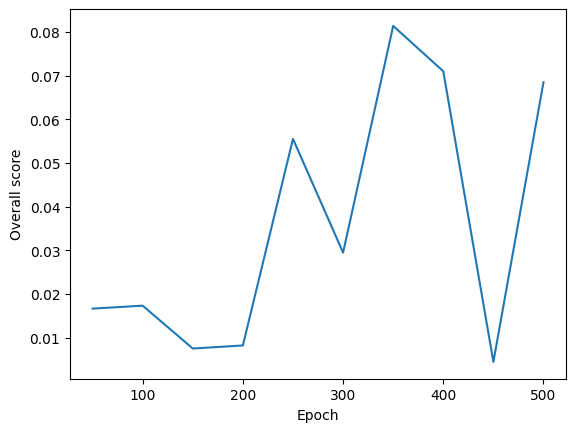

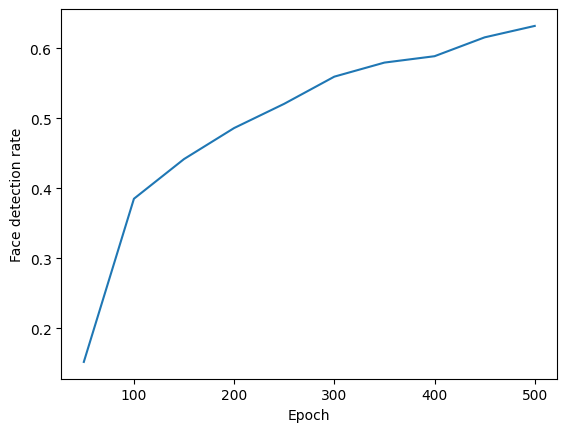

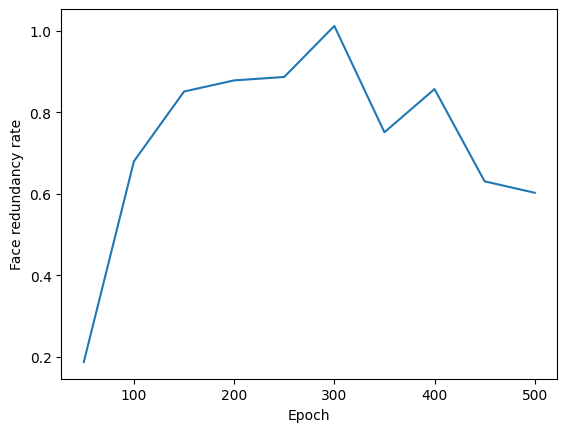

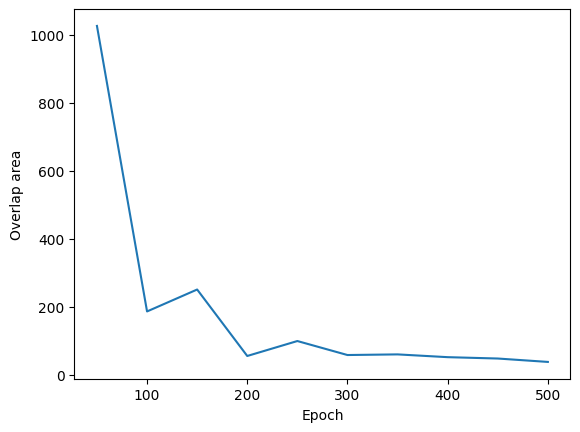

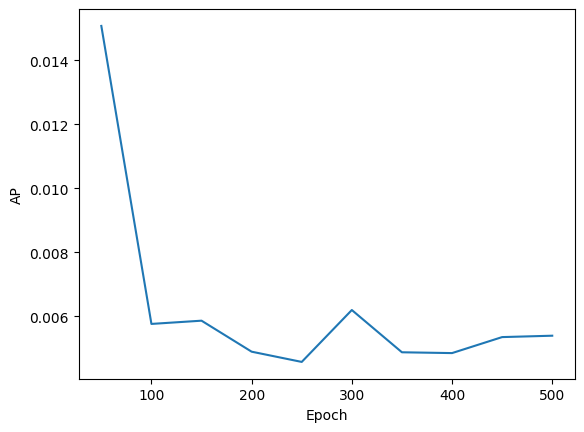

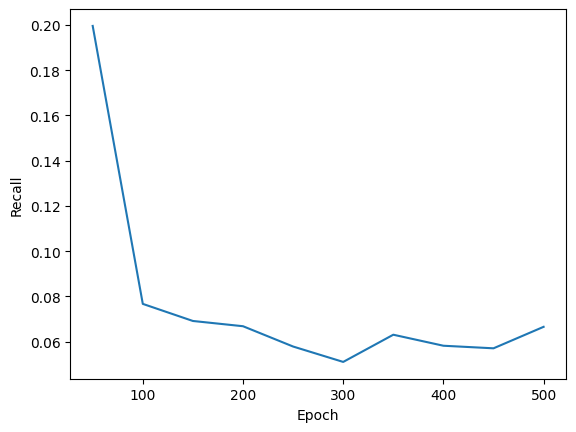

[0.022458753709198812, 0.014445553145336227, 0.008106181015452539, 0.002971119842829077, 0.05129042145593869, 0.03853256637168141, 0.023857386363636362, 0.036462639405204465, 0.0029003999999999996, 0.025916596638655462]
[0.00028753709198813064, 0.00028753709198813064, 0.00028753709198813064, 0.011006073752711495, 0.011006073752711495, 0.011006073752711495, 0.007236865342163355, 0.007236865342163355, 0.007236865342163355, 0.008165422396856583, 0.008165422396856583, 0.008165422396856583, 0.1012295019157088, 0.1012295019157088, 0.1012295019157088, 0.06767132743362832, 0.06767132743362832, 0.06767132743362832, 0.09101780303030302, 0.09101780303030302, 0.09101780303030302, 0.07414851301115243, 0.07414851301115243, 0.07414851301115243, 0.007436, 0.007436, 0.007436, 0.10418634453781513, 0.10418634453781513, 0.10418634453781513]
[0.011889020771513355, 0.011889020771513355, 0.01602537960954447, 0.01602537960954447, 0.005820309050772627, 0.005820309050772627, 0.007297249508840864, 0.007297249508

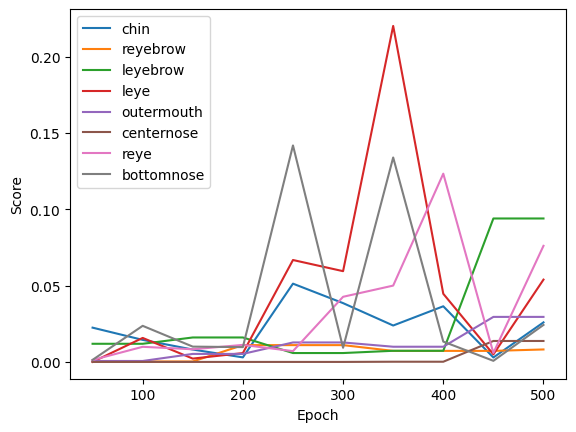

In [1]:
# analyze eval metrics
import numpy as np
from quickcsv.file import *
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import json

def plot_line(X,Y,ylabel=None,combine=False):
    '''
    plt.xlabel("Epoches")
    plt.ylabel("Score")
    plt.plot(X, Y)
    plt.show()  
    '''
    list_model=[]
    for idx,x in enumerate(X):
        list_model.append({'Epoch':x,ylabel:Y[idx]})
    df=create_df(list_model)
    sns.lineplot(data=df, x="Epoch", y=ylabel)
    if not combine:
        plt.show()

def plot_line_with_legend(X,Y,ylabel=None,combine=False,label=''):
    '''
    plt.xlabel("Epoches")
    plt.ylabel("Score")
    plt.plot(X, Y)
    plt.show()  
    '''
    list_model=[]
    for idx,x in enumerate(X):
        list_model.append({'Epoch':x,ylabel:Y[idx]})
    df=create_df(list_model)
    sns.lineplot(data=df, x="Epoch", y=ylabel,label=label)
    if not combine:
        plt.show()

epoches = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels=['chin', 'reyebrow', 'reyebrow', 'leyebrow', 'leyebrow', 'leye', 'outermouth', 'centernose', 'centernose', 'reye', 'bottomnose', 'reyebrow', 'outermouth']
X=[]
Y_score=[]
Y_detect=[]
Y_red=[]
Y_overlap=[]
Y_AP=[]
dict_Y_parts={}
Y_recall=[]

for l in labels:
    dict_Y_parts[l]=[]
for epoch in epoches:
    csv_path=f'evals2/eval_128_{epoch}.csv'
    list_item=read_csv(csv_path)
    sum_over_score=0
    sum_y_detect=0
    sum_red=0
    sum_overlap=0
    sum_AP=0
    sum_face_parts={}
    sum_recall=0
    for l in labels:
        sum_face_parts[l]=[]
    for item in list_item:
        over_score=item['Overall score']
        sum_over_score+=float(over_score)
        sum_y_detect+=float(item['Face detection rate'])
        sum_red+=float(item['Face redundancy rate'])
        sum_overlap+=float(item['Overlap area'])
        sum_AP+=float(item['AP'])
        
        # print(item['recall'])
        sum_recall+=float(item['recall'])
        # print(item['Face part scores'])
        face_parts=ast.literal_eval(item['Face part scores'])
        for k in labels:
            if k in face_parts:
                sum_face_parts[k].append(face_parts[k])
            else:
                sum_face_parts[k].append(0)
        
    for k in labels:
        dict_Y_parts[k].append(np.mean(sum_face_parts[k]))
        
    
    
        
    avg_score=sum_over_score/len(list_item)
    avg_y_detect=sum_y_detect/len(list_item)
    avg_red=sum_red/len(list_item)
    avg_overlap=sum_overlap/len(list_item)
    avg_AP=sum_AP/len(list_item)
    avg_recall=sum_recall/len(list_item)
    
    X.append(epoch)
    
    Y_score.append(avg_score)
    Y_detect.append(avg_y_detect)
    Y_red.append(avg_red)
    Y_overlap.append(avg_overlap)
    Y_AP.append(avg_AP)
    Y_recall.append(avg_recall)
    
plot_line(X,Y_score,ylabel='Overall score')
plot_line(X,Y_detect,ylabel='Face detection rate')
plot_line(X,Y_red,ylabel='Face redundancy rate')
plot_line(X,Y_overlap,ylabel='Overlap area')
plot_line(X,Y_AP,ylabel='AP')
plot_line(X,Y_recall,ylabel='Recall')

for k in dict_Y_parts:
    print(dict_Y_parts[k])
    plot_line_with_legend(X,dict_Y_parts[k],combine=True,ylabel='Score',label=k)



In [2]:
# summarize the results

# face parts
print(f'Face part\tScore')
for k in dict_Y_parts:
    # print(dict_Y_parts[k])
    mean_v=np.mean(dict_Y_parts[k])
    '''
    for p in dict_Y_parts[k]:
        print(k)
        print(f'{round(p,4)}\t',end='')
    '''
    
    print(f'{k}\t{round(mean_v,4)}')

print()
'''
    Y_score.append(avg_score)
    Y_detect.append(avg_y_detect)
    Y_red.append(avg_red)
    Y_overlap.append(avg_overlap)
    Y_AP.append(avg_AP)
    Y_recall.append(avg_recall)
'''

print(f'Face overall detection score\t{round(np.mean(Y_score),4)}')
print(f'Face detection rate\t{round(np.mean(Y_detect),4)}')
print(f'Face redundancy rate\t{round(np.mean(Y_red),4)}')
print(f'Face overlap area\t{round(np.mean(Y_overlap),4)}')
print(f'AP\t{round(np.mean(Y_AP),4)}')
print(f'Recall\t{round(np.mean(Y_recall),4)}')



Face part	Score
chin	0.0227
reyebrow	0.0472
leyebrow	0.0542
leye	0.0474
outermouth	0.0323
centernose	0.0102
reye	0.0336
bottomnose	0.0368

Face overall detection score	0.036
Face detection rate	0.4961
Face redundancy rate	0.734
Face overlap area	187.4752
AP	0.0063
Recall	0.0766


In [7]:
# Evalue 2

csv_path=f'evals2/eval_128_500.csv'
list_item=read_csv(csv_path)
sum_over_score=0
sum_y_detect=0
sum_red=0
sum_overlap=0
sum_AP=0
sum_face_parts={}
sum_recall=0
for l in labels:
    sum_face_parts[l]=[]
for item in list_item:
    over_score=item['Overall score']
    sum_over_score+=float(over_score)
    sum_y_detect+=float(item['Face detection rate'])
    sum_red+=float(item['Face redundancy rate'])
    sum_overlap+=float(item['Overlap area'])
    sum_AP+=float(item['AP'])
    
    # print(item['recall'])
    sum_recall+=float(item['recall'])
    # print(item['Face part scores'])
    face_parts=ast.literal_eval(item['Face part scores'])
    for k in labels:
        if k in face_parts:
            sum_face_parts[k].append(face_parts[k])
        else:
            sum_face_parts[k].append(0)

list_face_parts=[]
count=0
for item in sum_face_parts['chin']:
    model={}
    for l in labels:
        model[l]=sum_face_parts[l][count]
    list_face_parts.append(model)
    count+=1

write_csv('results2/list_face_parts.csv',list_face_parts)

Read CSV: ['Overall score', 'Face part scores', 'Face detection rate', 'Face redundancy rate', 'Overlap area', 'AP', 'recall', 'mean precision', 'image_id']  <- (evals2/eval_128_500.csv)
Write CSV: ['chin', 'reyebrow', 'leyebrow', 'leye', 'outermouth', 'centernose', 'reye', 'bottomnose']  -> (results2/list_face_parts.csv)
